## (1) FIRST PROTOTYPE
#Build a function that recommends a hot song in case the user indicates a hot song and returns nothing otherwise

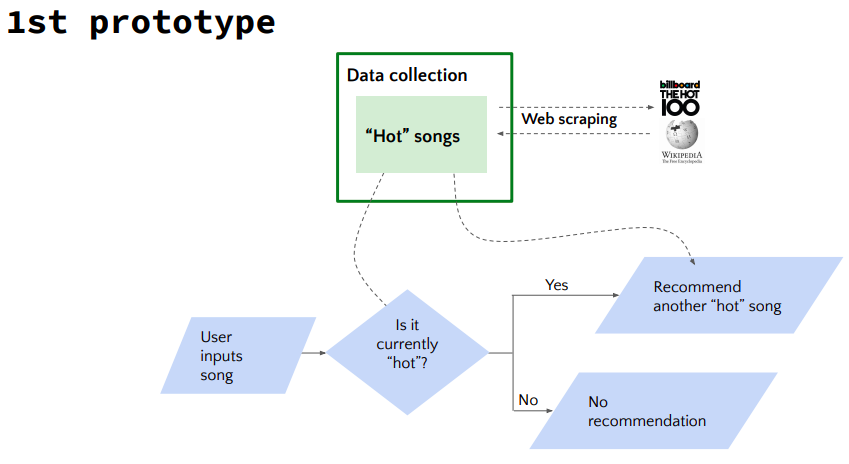

In [140]:
#visual explanation of what to do
from IPython.display import Image, display
display(Image(filename='pr2.png'))

In [2]:
#CODE FOR THE FIRST PROTOTYPE:

In [141]:
#importing libraries
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

from bs4 import BeautifulSoup
import requests
import pandas as pd

In [142]:
#Getting the information on hot songs:
url = "https://www.billboard.com/charts/hot-100" #I first create a variable called url with the webpage
response = requests.get(url) #I now extract the html of this url
response.status_code #Now see the code, as it is 200, we're good!
#response.content #Check the content
soup = BeautifulSoup(response.content, "html.parser") #and now convert it into a soup so that we can work with it
#soup #to check it

200

In [143]:
#Puttng the hot songs into a DataFrame:
ranking = []
song = []
artist = []

num_iter = len(soup.select('span.chart-element__information__song'))

for i in range(num_iter):
    song.append(soup.select('span.chart-element__information__song')[i].get_text())
    artist.append(soup.select('span.chart-element__information__artist')[i].get_text())
    ranking.append(soup.select('span.chart-element__rank__number')[i].get_text())

#Finally, I will convert the list into a table:
songs = pd.DataFrame({"ranking":ranking,"song":song,"artist":artist})
songs.head()

,ranking,song,artist
0,1,Rapstar,Polo G
1,2,Leave The Door Open,Silk Sonic (Bruno Mars & Anderson .Paak)
2,3,Peaches,Justin Bieber Featuring Daniel Caesar & Giveon
3,4,Montero (Call Me By Your Name),Lil Nas X
4,5,Levitating,Dua Lipa Featuring DaBaby


In [144]:
#Building the function:

from random import randrange

def check(x):
    if songs['song'][songs['song']==x].count() > 0: #if the user song is found in the hot list more than 0 times
        random_song = songs['song'][songs['song']!=x][randrange(99)] #random song = a ranom song from the list, different from the one chosen
        random_artist = (pd.DataFrame(songs[songs['song']==random_song]['artist'])).iloc[0,0] #random artist is the artist associated to that song. pd dataframe and iloc used so that i do not get the "index" at the beginning of the anwer!
        print('If you like',userinput,'-> you could also listen to:',random_song,'from',random_artist)
    else:
        print('Not in the hot list!')

userinput = input('').title()
check(userinput)

rapstar
If you like Rapstar -> you could also listen to: Cry Baby from Megan Thee Stallion Featuring DaBaby


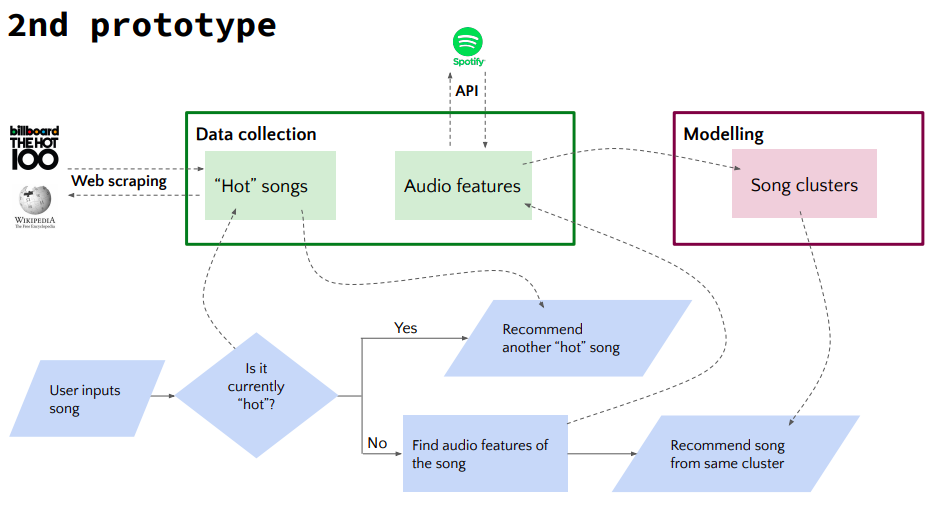

In [145]:
#SECOND PROTOTYPE
#Build a recommender that recommends spotify songs according to audio features
display(Image(filename='pr3.png'))

In [8]:
#CODE OF THE SECOND PROTOTYPE HERE:

In [9]:
#FIRSTLY: Collecting the data (playlist with: songs, artists and audio features)
#It should be placed in a DataFrame

In [146]:
#importing libraries
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

#credentials security
secrets_file = open("secrets.txt","r")
string = secrets_file.read()
secrets_dict={}
for line in string.split('\n'):
  secrets_dict[line.split(':')[0]]=line.split(':')[1]

#initializing spotipy
#Initialize SpotiPy with user credentials
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=secrets_dict['cid'],
                                                           client_secret=secrets_dict['csecret']))

In [147]:
#Playlists I want:
p1 = "2FC4daXjU4fC8ZFeGp749v"

In [148]:
#Function to add all next pages into my playlist
def get_playlist_tracks(playlist_id):
    results = sp.user_playlist_tracks("spotify",playlist_id)
    tracks = results['items']
    while results['next']!=None:
        results = sp.next(results)
        tracks = tracks + results['items']
    return tracks

In [149]:
p1 = get_playlist_tracks(p1)

new_list = []
for i in range(len(p1)):
    new_list.append(sp.audio_features(p1[i]["track"]["uri"]))

In [150]:
#Puttng AUDIO FEATURES into a DataFrame:
danceability = []
energy = []
key = []
loudness = []
speechiness = []
acousticness = []
instrumentalness = []
liveness = []
valence = []
tempo = []
type = []
id = []
uri = []
track_href = []
analysis_url = []
duration_ms = []
time_signature = []
mode = []

num_iter = len(p1)

for i in range(num_iter):
    danceability.append(new_list[i][0]['danceability'])
    energy.append(new_list[i][0]['energy'])
    key.append(new_list[i][0]['key'])
    loudness.append(new_list[i][0]['loudness'])
    speechiness.append(new_list[i][0]['speechiness'])
    mode.append(new_list[i][0]['mode'])
    acousticness.append(new_list[i][0]['acousticness'])
    instrumentalness.append(new_list[i][0]['instrumentalness'])
    liveness.append(new_list[i][0]['liveness'])
    valence.append(new_list[i][0]['valence'])
    tempo.append(new_list[i][0]['tempo'])
    type.append(new_list[i][0]['type'])
    id.append(new_list[i][0]['id'])
    uri.append(new_list[i][0]['uri'])
    track_href.append(new_list[i][0]['track_href'])
    analysis_url.append(new_list[i][0]['analysis_url'])
    duration_ms.append(new_list[i][0]['duration_ms'])
    time_signature.append(new_list[i][0]['time_signature'])

In [151]:
audio_features = pd.DataFrame({"danceability":danceability,'energy':energy,'key':key,'loudness':loudness,'speechiness':speechiness
                              ,'acousticness':acousticness,'instrumentalness':instrumentalness
                              ,'liveness':liveness,'valence':valence,'tempo':tempo,'uri':uri})
audio_features.shape
audio_features

(981, 11)

,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,uri
0,0.802,0.863,2,-4.443,0.0828,0.1040,0.000000,0.0498,0.561,93.002,spotify:track:5m3JK8xXGGAWGnHf2CYUDa
1,0.637,0.945,5,-3.540,0.1350,0.0373,0.000000,0.1160,0.578,198.050,spotify:track:2UYXTSZkSxWJYGpcd64SRO
2,0.720,0.774,9,-7.891,0.2650,0.0637,0.000083,0.3170,0.713,178.059,spotify:track:0pH04GzVsaMoDTGLUm6UKW
3,0.633,0.749,1,-4.962,0.0961,0.1800,0.000000,0.0783,0.816,179.872,spotify:track:54Em6QZvAxt1tblPNAqfD7
4,0.806,0.875,7,-3.817,0.0880,0.0838,0.001920,0.0650,0.917,125.063,spotify:track:3pDhN3qB33AOPhQEkUCaWt
...,...,...,...,...,...,...,...,...,...,...,...
976,0.781,0.931,11,-3.436,0.0689,0.3300,0.000694,0.3230,0.709,119.905,spotify:track:7y509djdQxE44sohaOcmxQ
977,0.908,0.813,5,-2.749,0.0777,0.3050,0.000000,0.2780,0.924,97.018,spotify:track:4DHDIdeayp8xvlyg22wREO
978,0.825,0.771,2,-2.515,0.0796,0.0750,0.000039,0.0930,0.929,154.001,spotify:track:3ymdUMzgylwrSfpxdlCUWV
979,0.739,0.627,9,-6.063,0.1280,0.2930,0.000000,0.4770,0.251,134.045,spotify:track:20pJKlNIU3J1CrvhBr1kQ8


In [152]:
#converting 'p1' into a DataFrame (only taking uri, title of the song and artists)
uri = []
title = []
artist = []

for i in range(len(p1)):
    uri.append(p1[i]['track']['uri'])
    title.append(p1[i]['track']['name'])
    artist.append(p1[i]['track']['artists'][0]['name'])



In [153]:
playlist_songs = pd.DataFrame({"uri":uri,'title':title,'artist':artist})

new_data = playlist_songs.merge(audio_features,left_on='uri',right_on='uri')

In [214]:
#SECONDLY: Clustering

In [158]:
# K-means
import numpy as np
import matplotlib.pyplot as plt

from sklearn import cluster, datasets
from sklearn.preprocessing import StandardScaler
from matplotlib.lines import Line2D

In [160]:
#with k-mean we need to scale:
X = audio_features.drop(['uri'],axis=1)

transformer = StandardScaler().fit(X)
X_prep = transformer.transform(X)
pd.DataFrame(X_prep, columns=X.columns).head()


,danceability,energy,key,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,0.500498,0.783852,-0.988653,0.285923,-0.429648,-0.434562,-0.098889,-0.913699,-0.740742,-0.881530
1,-1.366852,1.561085,-0.170199,0.833373,0.218712,-0.860281,-0.098889,-0.492717,-0.644873,2.267969
2,-0.427518,-0.059731,0.921075,-1.804449,1.833400,-0.691781,-0.096520,0.785488,0.116439,1.668609
3,-1.412121,-0.296692,-1.261472,-0.028724,-0.264453,0.050517,-0.098889,-0.732460,0.697292,1.722965
4,0.545767,0.897593,0.375438,0.665440,-0.365060,-0.563490,-0.044024,-0.817038,1.266867,0.079708


KMeans(n_clusters=2, random_state=1234)

KMeans(n_clusters=3, random_state=1234)

KMeans(n_clusters=4, random_state=1234)

KMeans(n_clusters=5, random_state=1234)

KMeans(n_clusters=6, random_state=1234)

KMeans(n_clusters=7, random_state=1234)

KMeans(random_state=1234)

KMeans(n_clusters=9, random_state=1234)

KMeans(n_clusters=10, random_state=1234)

KMeans(n_clusters=11, random_state=1234)

KMeans(n_clusters=12, random_state=1234)

KMeans(n_clusters=13, random_state=1234)

KMeans(n_clusters=14, random_state=1234)

KMeans(n_clusters=15, random_state=1234)

KMeans(n_clusters=16, random_state=1234)

KMeans(n_clusters=17, random_state=1234)

KMeans(n_clusters=18, random_state=1234)

KMeans(n_clusters=19, random_state=1234)

<Figure size 1152x576 with 0 Axes>

Text(0.5, 0, 'k')

Text(0, 0.5, 'inertia')

([<matplotlib.axis.XTick at 0x7fee15021d00>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

Text(0.5, 1.0, 'Elbow Method showing the optimal k')

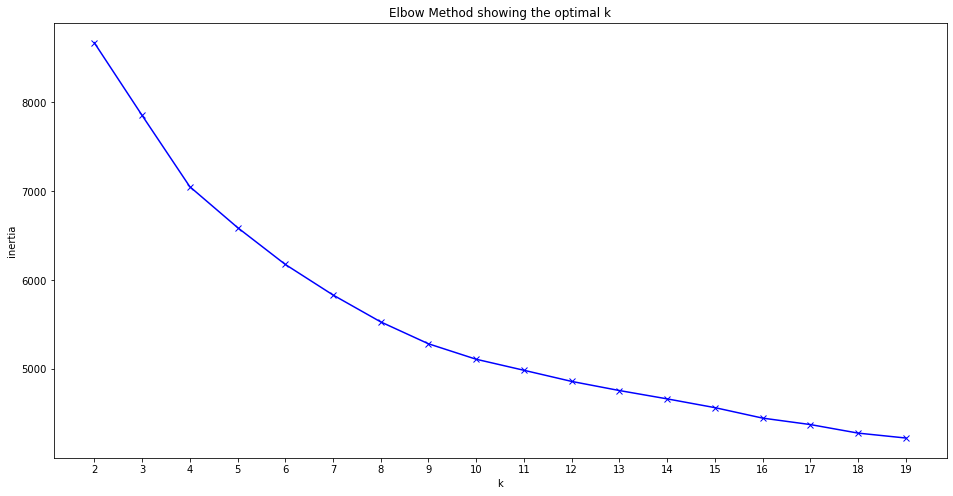

In [161]:
#Choosing k:
import numpy as np
K = range(2, 20)
inertia = []

for k in K:
    kmeans = KMeans(n_clusters=k,
                    random_state=1234)
    kmeans.fit(X_prep)
    inertia.append(kmeans.inertia_)

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,8))
plt.plot(K, inertia, 'bx-')
plt.xlabel('k')
plt.ylabel('inertia')
plt.xticks(np.arange(min(K), max(K)+1, 1.0))
plt.title('Elbow Method showing the optimal k')

#k =4 is the best according to the graph!

In [162]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=4,
                init="k-means++",
                n_init=40,  
                max_iter=10,
                random_state=1234)
kmeans.fit(X_prep)

clusters = kmeans.predict(X_prep)

#score and value counts:
kmeans.inertia_
pd.Series(clusters).value_counts().sort_index()

KMeans(max_iter=10, n_clusters=4, n_init=40, random_state=1234)

7054.234110537589

0    497
1    231
2      3
3    250
dtype: int64

In [163]:
#THIRDLY: Building the recommender

In [164]:
cluster_and_audio = pd.concat([pd.DataFrame(clusters),audio_features,],axis=1)
cluster_and_audio.rename(columns = {0 : 'cluster'}, inplace = True)
cluster_audio_songs = cluster_and_audio.merge(playlist_songs,left_on='uri',right_on='uri')

In [251]:
#Building the function:

from random import randrange

def protorype(x):
    if songs['song'][songs['song']==x].count() > 0: #if the user song is found in the hot list more than 0 times
        random_song = songs['song'][songs['song']!=x][randrange(99)] #random song = a ranom song from the list, different from the one chosen
        random_artist = (pd.DataFrame(songs[songs['song']==random_song]['artist'])).iloc[0,0] #random artist is the artist associated to that song. pd dataframe and iloc used so that i do not get the "index" at the beginning of the anwer!
        print('If you like',userinput,'-> you could also listen to:',random_song,'from',random_artist)
    else:
        song_search = sp.search(q=x)
        uri = song_search['tracks']['items'][0]['uri']
        audio_f = sp.audio_features(uri)
        for i in audio_f:
            audio_features_song = pd.DataFrame({str(i):i}).T.reset_index()
            audio_features_song = audio_features_song.drop(['index','uri','track_href','type','time_signature','id','analysis_url','duration_ms','mode'],axis=1)
            audio_features_song = audio_features_song.apply(pd.to_numeric)
            song_scaled = transformer.transform(audio_features_song)
            cluster = kmeans.predict(song_scaled)
        songs_same_cluster = pd.DataFrame(cluster_audio_songs['title'][cluster_audio_songs['cluster']==(int(cluster))])
        random_song_pre = pd.DataFrame(songs_same_cluster.sample(1))
        random_song = random_song_pre['title'].to_string(index=False).lstrip()
        random_artist_pre = pd.DataFrame(cluster_audio_songs['artist'][cluster_audio_songs['title']==random_song])
        random_artist = random_artist_pre['artist'].to_string(index=False)
        print('If you like',userinput,'-> you could also listen to:',random_song,'from', random_artist)

userinput = input('').title()
protorype(userinput)

bad romance
If you like Bad Romance -> you could also listen to: Si Tú La Ves (feat. Wisin) from  Nicky Jam
